# Final Assignment \- 21139601



## 1.Introduction

In the following notebook, knowledge of boundary value problems is going to be used to solve one\-dimensional time\-independent schrödinger equation under different potentials. All of these potentials will include an infinite potential well. These can be written in the form:
$$ \frac{-h^2}{2m}\frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)$$where, 

\begin{gather*}
  V_x=\left\{
    \begin{array}{ll}
      V, & \mbox{if $-a \le x \le +a$}.\\
      \infty, & \mbox{if $\lvert x \rvert > a$}.
    \end{array}
  \right.
  \end{gather*}

Where V is 0 for the very first case considered. In all cases, solutions for an infinite well show that wherever $V(x) = \infty$, the probability for finding a particle is 0. Therefore, the wavefunction must be subject to the boundary conditions of $\psi = 0$ at $x = -a$ and $x = +a$.

The introduction of boundary conditions allows the use the secant method to find the solutions to the function. More about the secant method is written further down in the notebook.

Note: Many of the variables are redefined further down in the code after they are first initialised. If you would like to change any part of the code to check its functionality, please make sure you restart the kernel and run all. Furthermore, before running the code, please make sure the following libraries are installed.

- Numpy
- Matplotlib
- Math
- Iter\_tools  



## 3.A Quantum Dot In a Vacuum

### 3.1 Finding the Ground State Energy



In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m_e = 9.1093833702 * 10**-31 #electron mass
h_bar = 1.054571817 * 10**-34 #planck's constant divided by 2pi
e = 1.602176634 * 10**-19 #elemetnary charge

In [3]:
def V_0():
    '''
    Potential function for the wavefunction.
    Returns 0.
    '''
    return 0.0

In order to solve for $\psi(x)$, the Runge\-Kutta method is used. In this case, the second\-order differential is broken down into first\-order ones as:
$$\frac{d\psi}{dx} = \phi$$
$$\frac{d\phi}{dx} = \frac{2m}{\hbar^2}\left[V(x)-E\right] \psi(x)$$

The Runge\-Kutta function will now be used to solve for $\psi$ with boundary value conditions. Note that the loop in the Runge\-Kutta function does not add the very last $\psi(x)$ value. Therefore, it has been appended to the arrays at the end of the solution. It is essential that this value must be equal to 0 once the solution has been reached. 



In [4]:
#Repurposed from PHAS0029-C7-instructions.ipnyb
def f(r,x,E):
    '''
    Function that calculates the RHS of 
    split first order schrödinger equation:
    Input: 
    r: array with values of wavefunction and differentiated wavefunction
    x: array with position points
    E: Energy of the wavefunction
    Output:
    array of values for RHS of split first order schrödinger equation
    '''
    psi = r[0]
    phi = r[1]
    fpsi = phi # rhs for dpsi/dx
    fphi = (2*m_e/(h_bar**2))*(V_0() - E)*psi #rhs for dphi/dx
    return np.array([fpsi,fphi])

In [5]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
def RungeKutta2d(r,pospoints, E):
    '''
    Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is psi, second phi
            pospoints: array of position values.
    Outputs:[psipoints]: solutions for psi(x), array of one value '''
    initialphi = 1 #guess for initial phi value
    r = np.array([0, initialphi],float) #initial r-value array
    psipoints = [] # initialise empty arrays
    for x in pospoints: # loops over all pospoints till a step before final value
        psipoints.append(r[0]) # append initial psi value into array

        #Apply Runge-Kutta

        k1 = h*f(r,x, E) 
        k2 = h*f(r+0.5*k1, x+0.5*h, E)
        k3 = h*f(r+0.5*k2, x+0.5*h, E)
        k4 = h*f(r+k3, x+h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    psipoints.append(r[0])#This value appended to the end because the last value is what is required.
    return np.array(psipoints)

Note that the initial guess for $\phi$ does not matter, as the wavefunction can be normalised once a solution has been found.  



 The secant method is an extension of the  _Newton\-Raphson method_, in which the x\-intercept of the gradient at any point in a function is used to get closer to the root of the function. This method is then repeated till covergence at the actual root. This is shown in the equation below: 

$$x' = x - \Delta x = x - \frac{f(x)}{f'(x)}.$$

The secant method goes one step further, and uses two points $x_1$ and $x_2$, to calculate an approximate gradient at $x_2$.   


$$f'(x_2) \approx \frac{f(x_2) - f(x_1)}{x_2 - x_1}$$

Putting this into the _Newton\-Raphson method_ equation, 

$$x_3 = x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)},$$

It is this method of iteratively finding the root of a function that will be used to find the eigenenergies in the cases presented in this notebook. Specifically, two guesses for eigenenergies will be presented, and the secant method will iterate using these energies, to find a solution for $\psi$ where the last value in the array is 0.



In [6]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
d = 5e-9 #box length
a = d/2
posstart = -a #start x-position
posend = a #end x-position
N = 2000 
h = (posend - posstart)/N #step
pospoints = np.arange(posstart, posend, h)

#Energy guesses
E1 =0
E2 =1e-21

#finding psi value for both guesses
psi1 = RungeKutta2d(np.array([0]),pospoints,E1)[-1]
psi2 = RungeKutta2d(np.array([0]),pospoints,E2)[-1]
print (psi1,psi2)




5.000000000000119e-09 2.2215514252072734e-09


In [7]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
tolerance = e/100000
while abs(E1-E2) > tolerance: #while loop till tolerance is reached

    psi1 = RungeKutta2d(np.array([0]),pospoints, E1)[-1]
    psi2 = RungeKutta2d(np.array([0]),pospoints, E2)[-1]
    E3 = E2 - psi2*(E2-E1)/(psi2-psi1)
    E1 = E2
    E2 = E3 #copying to a new variable
    print(E2) #print after every iteration

print(f"Ground State energy is {E2/e} eV") #convert to electronvolts and print


1.7995654284776195e-21
2.217342674970205e-21
2.378223352793956e-21


2.408049893875847e-21
2.4098492648700038e-21
2.4098670355347456e-21
Ground State energy is 0.01504120697053397 eV


### 3.2 Finding the Ground State Wavefunction



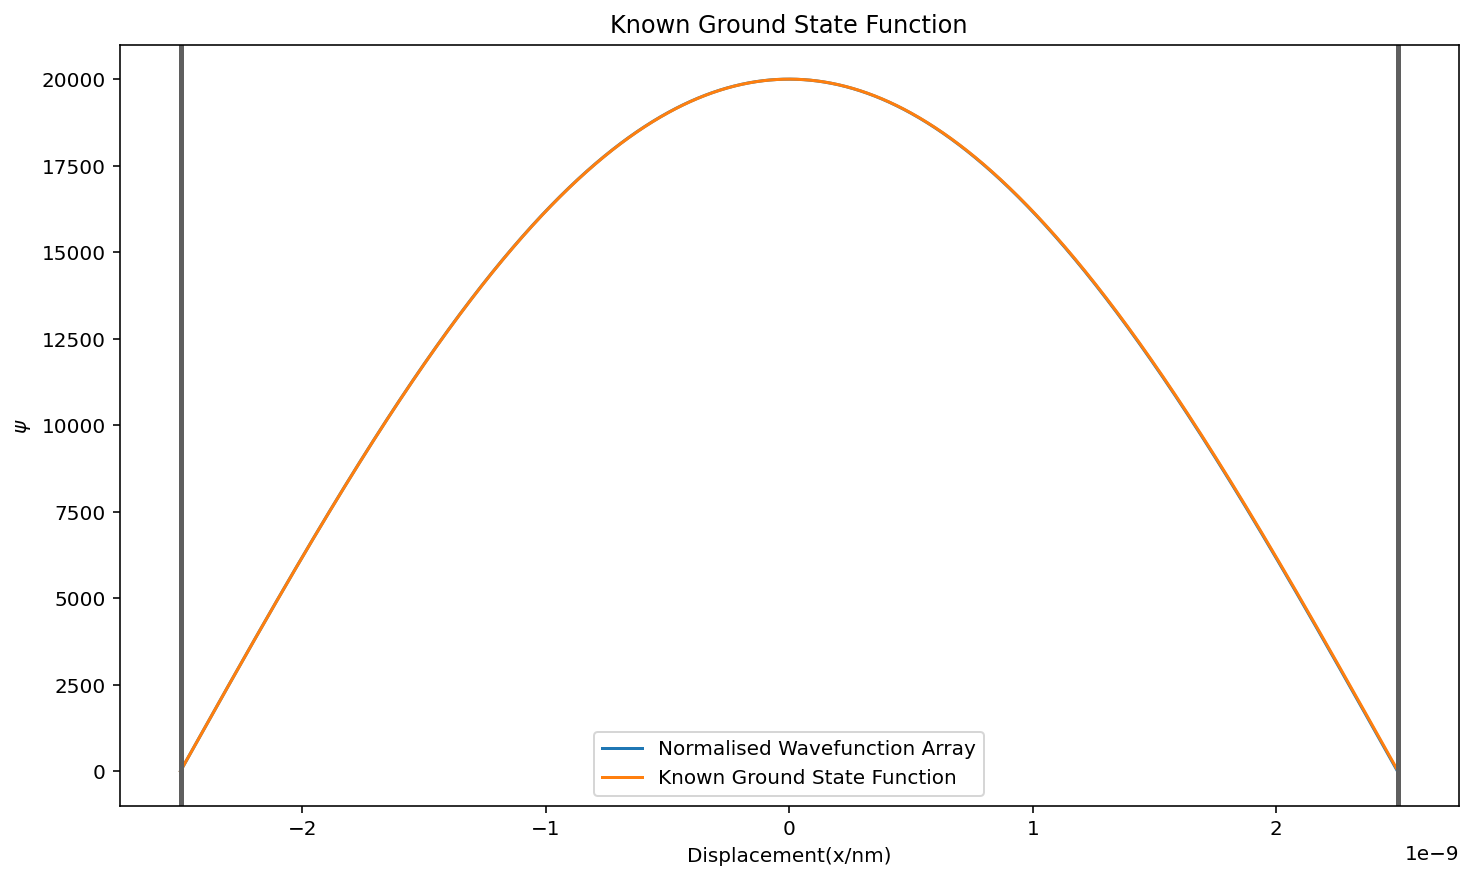

In [8]:
psisquared = (RungeKutta2d(np.array([0]),pospoints,E2))**2 #squaring the array
psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2])) #integrating using the trapezoidal rule
normpsi = (RungeKutta2d(np.array([0]),pospoints,E2))/(np.sqrt(psiinteg)) #the normalised wavefunction
N_1 = 2001 #since the normalised wavefunction has size 2001
h_1 = (posend - posstart)/N_1 #step
pospoints_1 = np.arange(posstart, posend, h_1) 
plt.plot(pospoints_1, normpsi, '-', label = "Normalised Wavefunction Array")
#plotting walls
plt.axvline(x=-a, c = '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a, c = '#5f5f5f',ls='-',lw=2.5)
plt.title("Normalised Wavefunction Array")
plt.xlabel("Displacement(x/nm)")
plt.ylabel("$\psi$")
plt.legend()

gensol = (1/np.sqrt(a))*np.cos((np.pi*pospoints_1)/d) #plotting cosine solution with n = 1
plt.plot(pospoints_1, gensol, '-',label = "Known Ground State Function")
plt.axvline(x=-a, c = '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a, c = '#5f5f5f',ls='-',lw=2.5)
plt.title("Known Ground State Function")
plt.xlabel("Displacement(x/nm)")
plt.ylabel("$\psi$")
plt.legend()

### 3.3 Finding Higher Energy States



In [9]:
# Function to find the order of magnitude of a number
import math
def OrderOfMagnitude(number):
    '''
    Returns Order of Magnitue of Number
    Input: Any Number n, float
    Output: The order of 
            magnitude of 
            Input Number
    '''
    return math.floor(math.log(number, 10))


In [10]:
#Function to find energy of higher states of an infinite potential well, with 0 potential, analytically
def v0_analytic(n):
    '''
    Returns Energy of n+1 state in an infinite square well
    Input: Any number n, float
    Output: Energy of n+1 
            state in an infinite 
            square well
    '''
    energy = (((n+1)**2)*(h_bar**2)*(np.pi**2))/(2*e*m_e*d**2)
    return energy

In [11]:
#Energy guesses
E1 =0
E2 =1e-21

#finding psi value for both guesses
psi1 = RungeKutta2d(np.array([0]),pospoints,E1)[-1]
psi2 = RungeKutta2d(np.array([0]),pospoints,E2)[-1]


#initialising values
n = 0
z = 5 #Number of solutions required
E4 =2e-21 #smallest increment by which energy is increased to search for solution
E5 = 0 #holder for energy value
c = 1 #factor
eigenstates = [] #holder for eigenenergies

tolerance = e/100000 
while n != z: #iterate till z eigenvalues have been found
    while abs(E1-E2) > tolerance: #while loop till tolerance is reached
        psi1 = RungeKutta2d(np.array([0]),pospoints, E1)[-1]
        psi2 = RungeKutta2d(np.array([0]),pospoints, E2)[-1]
        E3 = E2 - psi2*(E2-E1)/(psi2-psi1)
        E1 = E2
        E2 = E3 #copying to a new variable

    if n != 0:
        if abs(E2 - E5) < (E4/2)*c: #check if new energy is the same as previous, *c to account for increasing value of eigenenergy
            n = n + 0
            c = c + 2 #increase factor
            E1 = 0
            E2 = E2 + c*E4 #add a greater value to E2, so it's closer to next eigenenergy
        else: #if new eigenergy has been reached
            n = n + 1 #increase n so that loop can move forward
            E1 = 0
            eigenstates.append(E2) #add eigenenergy to eigenstate array
            E2 = E2 + E4 #start process again for next eigenergy
            E5 = E3
    elif n == 0: #seperately written so that ground state energy can be initialised
        n = n + 1
        eigenstates.append(E2)#add eigenenergy to eigenstate array
        E4 = 2*10**OrderOfMagnitude(E2) #set new energy increase increment to the same order of magnitude as the first solution
        E1 = 0 #Set E1 to 0 again
        E2 = E2 + E4 #set new E2 value, to search for next eigenenergy
        E5 = E3 #store current E2 value in a new variable

ev_eigenstates = [x/e for x in eigenstates]
print_num = 0 #intialize number for loop

while print_num < z: #iterate till required eigenstate
    analytic = v0_analytic(print_num)
    print (f"eigenenergy {print_num+1} is {ev_eigenstates[print_num]}, analytic value is {analytic} eV")
    print_num = print_num + 1

eigenenergy 1 is 0.01504120697053397, analytic value is 0.015041207033272441 eV
eigenenergy 2 is 0.06016482807353156, analytic value is 0.060164828133089765 eV
eigenenergy 3 is 0.1353708601637855, analytic value is 0.13537086329945197 eV
eigenenergy 4 is 0.24065929331359653, analytic value is 0.24065931253235906 eV
eigenenergy 5 is 0.3760301751890865, analytic value is 0.37603017583181103 eV


There were a few things that were noticed in regards to finding the eigenenergies, which in turn helped create the solution the above. First, the eigenenergy found depended on the initial guess of the energies. This meant that as long as the first guess was lesser  \(even two orders of magnitude away\) than that of the ground state and the second guess was 0, the very first iteration would converge to the ground state. Second, the eigenenergies, behaved analagouos to minimas on a surface. This meant that as long as the initial guess was closer to an eigenenergy than any other eigenenrgy, the loop would converge to that specific eigenenergy. The loops above take advantage of this, and slowly increase the value of the initial guess and search for a solution.  


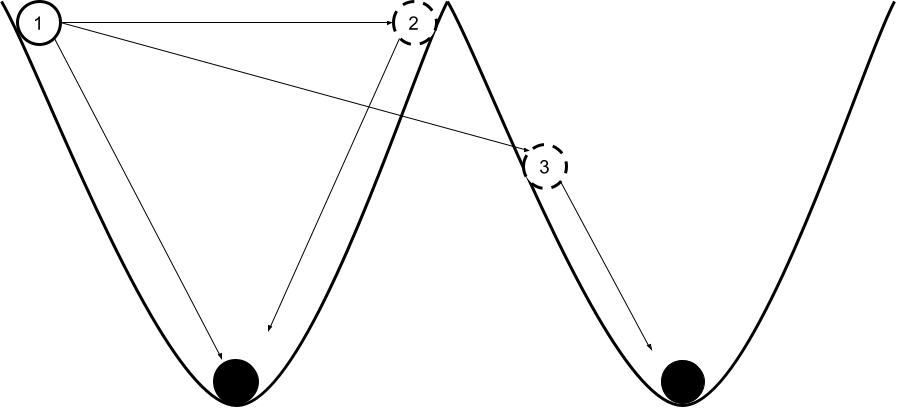
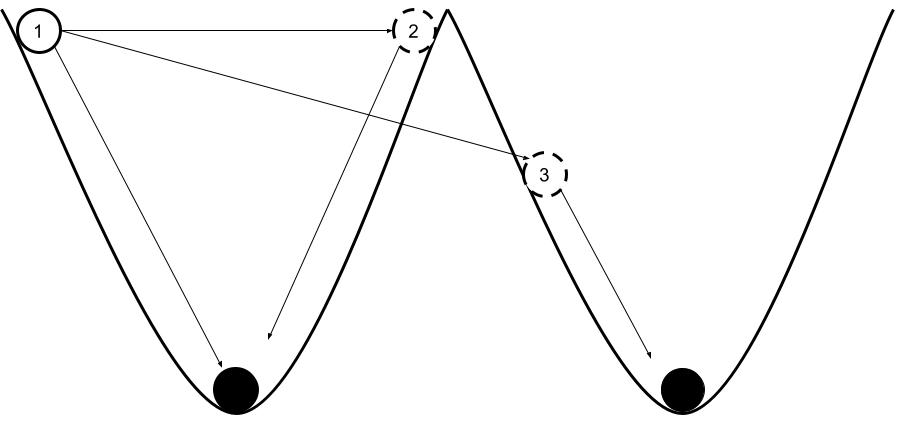

<center>
<img src="https://i.imgur.com/63461TU.png"   width="420px"  height="200px"  title="Solution" style="object-fit:cover"/>

The above image was made by me in Google Drawings, without the use of any external images. 

\(If the above image does not load, please see, https://i.imgur.com/63461TU.png \)  


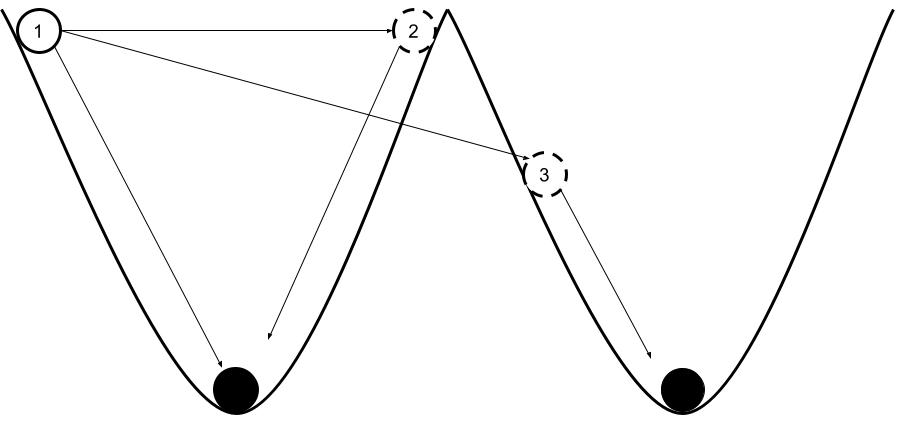

The above picture is provided for a visual representation for what the code is doing. If the first guess is at 1, the energy coverges to the first minima. The code then increases the guess to 2, which converges at the same minima. Therefore, the code then increases 1 by a larger number, which helps it reach the next minima, i.e, the next energy. Interestingly, this also leads to the conclusion that between any two eigenenergies, there must be a guess, for which the secant method will not be able to coverge to any minima, and will just return the guess. 

Adding to this observation, it highly likely that the there are perhaps 'local minima' present between these two energy minimas. While theoretically, it is hard to reason why, it can be seen quite easily in the case above. The analytical solution says that the first two eigenenergies are around 2.4e\-21J and 9.6e\-21J respectively. However, when the initial guesses are played around with, for guesses from ~ 5.3e\-21 to 5.9e\-21, the secant method provides multiple wrong roots, with values nowhere close to either of the eigenenergies. This presence of local minimas is extremely worrying for this solution, and suggests that the probability of erroneous measurements increases the more the solution is used. Fortunately, for the above case, the code seems to avoid these local minimas and is accurate to three significant figures till at least eigenenergy ~ 200 \(It was not tested past this for the sake of computing power\). 

The method used to find the eigenenergies meant that everytime the code converged to the same eigenenergy it was going to be slightly different from the last time it was found. To avoid counting the same slightly\-differing eigenergy as two seperate eigenenergies, an increasing toleracne value was used. This way it was ensured that the eigenenergy found was unique. 

Furthermore, it was seen that for cases where the potential were very high, the initial tolerance values were too small, leading to erroneous measurements. To account for this, the order of magnitude of the ground state energy was found, which could then be used in the tolerance value to lead to answers that had a much greater chance of being accurate.  



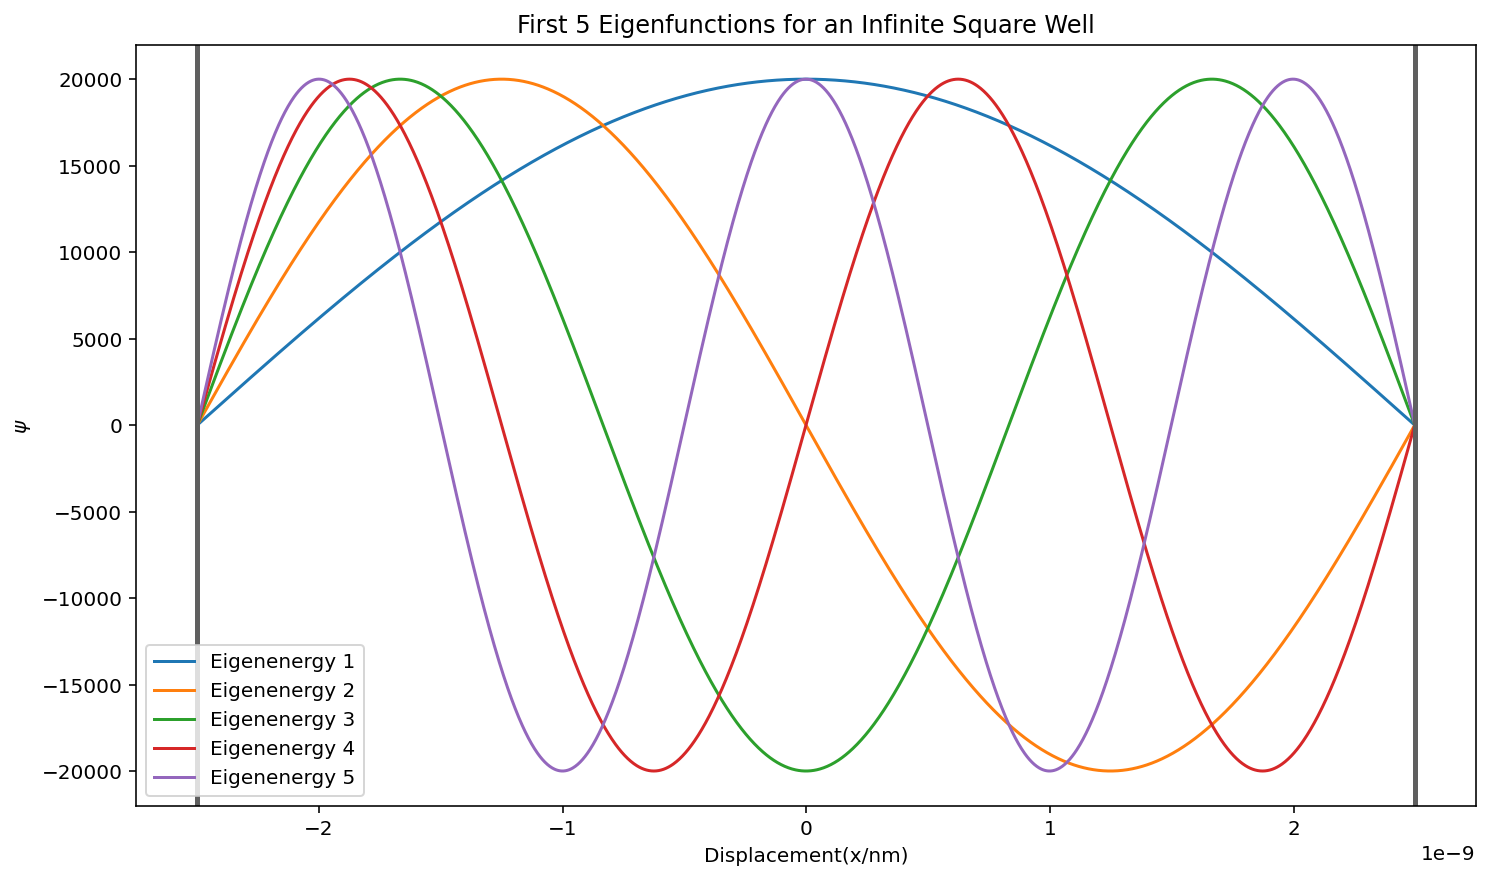

In [12]:
for i in eigenstates:
    psisquared = (RungeKutta2d(np.array([0]),pospoints,i))**2 #squaring the array
    psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2])) #integrating using the trapezoidal rule
    normpsi = (RungeKutta2d(np.array([0]),pospoints,i))/(np.sqrt(psiinteg)) #the normalised wavefunction
    N_1 = 2001 #since the normalised wavefunction has size 2001
    h_1 = (posend - posstart)/N_1 #step
    pospoints_1 = np.arange(posstart, posend, h_1) 
    plt.plot(pospoints_1, normpsi, '-', label = f"Eigenenergy {eigenstates.index(i)+1}")
plt.axvline(x=-a, c = '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a, c = '#5f5f5f',ls='-',lw=2.5)
plt.xlabel("Displacement(x/nm)")
plt.ylabel("$\psi$")
plt.title(f"First {len(eigenstates)} Eigenfunctions for an Infinite Square Well")
plt.legend()

### 3.4 Extension to 3D



In [13]:
#Function to find the energy given the squared sum of n_x, n_y, and n_z
def energy(n_sum):
    '''
    Returns energy for a n_sum = (n_x^2 + n_y^2 + n_z^2)
    Input: n_sum, float
    Output: Energy for given sum
    '''
    energy = n_sum*((np.pi**2*h_bar**2)/(2*m_e*d**2))
    return energy

from itertools import combinations_with_replacement
comb_array = [] #initialise the different combinations of n_x, n_y, and n_z
comb_sum = [] #intialise the array to hold n_sum
# Get all combinations of [1, 4, 9, 16] and length 3
comb = combinations_with_replacement([1, 4, 9, 16], 3)
for i in comb:
    comb_array.append(i) #find all combinations of n_x, n_y, and n_z
for i in comb_array:
    comb_sum.append(np.sum(i)) #find n_sum for all combinations
comb_sum.sort() #sort according to ascending order
comb_sum_unique = list(set(comb_sum)) #remove any duplicates
print("The first 10 n_sum and energies are:")
for i in comb_sum_unique[0:10]:
    print(f" for n_sum = {i}, energy is {energy(i)/e} eV") #print first 10 energies
freq = (energy(comb_sum_unique[1])-energy(comb_sum_unique[0]))/(h_bar*2*np.pi) #frequency of transition between first two energy levels
print(f"The transition from energy level E_111 to E_112 has a frequency of {freq}Hz, or a wavelength of {(3*(10**8))/freq}m")

The first 10 n_sum and energies are:
 for n_sum = 3, energy is 0.04512362109981732 eV
 for n_sum = 6, energy is 0.09024724219963463 eV
 for n_sum = 9, energy is 0.13537086329945197 eV
 for n_sum = 11, energy is 0.16545327736599683 eV
 for n_sum = 12, energy is 0.18049448439926927 eV
 for n_sum = 14, energy is 0.21057689846581415 eV
 for n_sum = 17, energy is 0.2557005195656315 eV
 for n_sum = 18, energy is 0.27074172659890394 eV
 for n_sum = 19, energy is 0.2857829336321764 eV
 for n_sum = 21, energy is 0.3158653476987212 eV
The transition from energy level E_111 to E_112 has a frequency of 10910843045012.713Hz, or a wavelength of 2.7495583866649825e-05m


The type of radiation emitted by a transition in energy level is dependent on the difference in energy between the two levels. For the transition for $E_{111}$ to $E_{112}$, the radiation was seen to be infrared. Contrary to what may be intuitive, for low values of  $n_x, n_y, n_z$ the energy levels for 3D quantum dot are quite evenly spaced. However, as the energy levels increase, there is a noticeable jump in the energy required to go to the next transition \- as a result of the increasing value of $n^2$. This becomes increasingly apparent when a large number of energy levels are considered.   



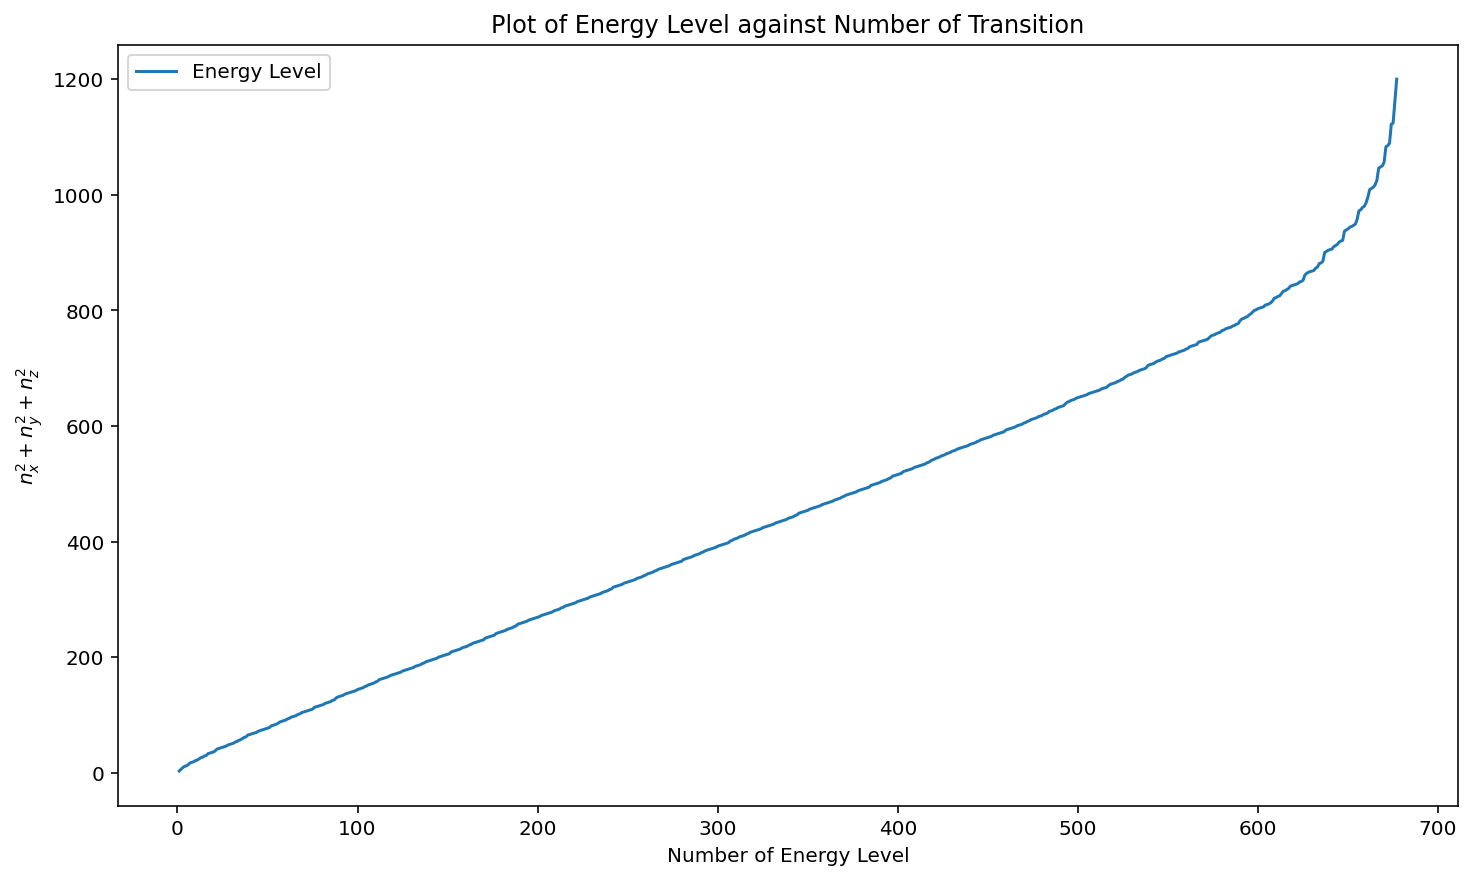

In [14]:
# Get all combinations of length 3 from n values of 1 to 20
comb = combinations_with_replacement([1,4,9,16,25,36,49,64,81,100,121,144,196,196,225,256,289,324,361,400], 3)
for i in comb:
    comb_array.append(i) #find all combinations of n_x, n_y, and n_z
for i in comb_array:
    comb_sum.append(np.sum(i)) #find n_sum for all combinations
comb_sum.sort() #sort according to ascending order
comb_sum_unique = list(set(comb_sum)) #remove any duplicates

#code to make an x-values array for number of energy levels in comb_sum_unique
n = 1
x_array = []
while n <= len(comb_sum_unique):
    x_array.append(n)
    n = n+1

#plotting the graph
plt.plot(x_array, comb_sum_unique, '-', label = f"Energy Level")
plt.xlabel(f"Number of Energy Level")
plt.ylabel("$n_x^2 + n_y^2 + n_z^2$")
plt.title("Plot of Energy Level against Number of Transition")
plt.legend()

In the above graph, all the different combinations from $E_{1,1,1}$ to$E_{200,200,200}$ were considered and the $n_x^2+n_y^2+n_z^2$ values were plotted in oder. Since the energy is simply proportional to this value, this was enough to see the relationship. It can be seen very clearly from the graph above that if a large number of energy levels are considered, the energy difference from one energy level to the next increases quite drastically.  



### 4 The Infinite "Unsquare" Well



#### _I. Harmonic Potential_



In the following section, the eigenvalues for the energies of a harmonic potential will be found and compared using the same method as above. For further analysis, eigenfunctions of this potential will be plotted as well. The harmonic potential being used in this sections can be written as:
$$V(x) = V_0\frac{x^2}{a^2}$$  



In [15]:
p_h = 1
def V_1(x,a=2.5e-9):
    '''
    Harmonic potential function
    Input: 
        x: position array
        a = 2.5e-9, default half-width
    Output:
        v_1: potential
    '''
    v_1 = p_h*e*((x)**2/(a)**2)
    return v_1

In [16]:
#Repurposed from PHAS0029-C7-instructions.ipnyb
def f_1(r,x,E):
    '''
    Function that calculates the RHS of 
    split first order schrödinger equation:
    Input: 
    r: array with values of wavefunction and differentiated wavefunction
    x: array with position points
    E: Energy of the wavefunction
    Output:
    array of values for RHS of split first order schrödinger equation
    '''
    psi = r[0]
    phi = r[1]
    fpsi = phi # rhs for dpsi/dx
    fphi = (2*m_e/(h_bar**2))*(V_1(x) - E)*psi #rhs for dphi/dx
    return np.array([fpsi,fphi])

In [17]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
def RungeKutta2d_1(r,pospoints, E):
    '''
    Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is psi, second phi
            pospoints: array of position values.
    Outputs:[psipoints]: solutions for psi(x), array of one value '''
    initialphi = 1 #guess for initial phi value
    r = np.array([0, initialphi],float) #initial r-value array
    psipoints = [] # initialise empty arrays
    for x in pospoints: # loops over all pospoints till a step before final value
        psipoints.append(r[0]) # append initial psi value into array

        #Apply Runge-Kutta

        k1 = h*f_1(r,x, E) 
        k2 = h*f_1(r+0.5*k1, x+0.5*h, E)
        k3 = h*f_1(r+0.5*k2, x+0.5*h, E)
        k4 = h*f_1(r+k3, x+h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    psipoints.append(r[0])
    #This value appended to the end to take care of the boundary condition, psi = 0 at ends.
    return np.array(psipoints)

In [18]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
#Energy guesses
E1 =0
E2 =1e-21

#finding psi value for both guesses
psi1_1 = RungeKutta2d_1(np.array([0]),pospoints,E1)[-1]
psi2_1 = RungeKutta2d_1(np.array([0]),pospoints,E2)[-1]
print (psi1_1,psi2_1)

5.203368715812892e-05 4.22331900990228e-05


In [19]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
tolerance = e/100000
while abs(E1-E2) > tolerance: #while loop till tolerance is reached

    psi1_1 = RungeKutta2d_1(np.array([0]),pospoints, E1)[-1]
    psi2_1 = RungeKutta2d_1(np.array([0]),pospoints, E2)[-1]
    E3 = E2 - psi2_1*(E2-E1)/(psi2_1-psi1_1)
    E1 = E2
    E2 = E3 #copying to a new variable
    print(E2) #print after every iteration
    
print(f"Ground State energy is {E2/e} eV")

5.309290625191491e-21
7.716689372647908e-21


9.9499888415609e-21


1.1386346325224056e-20
1.2185093731079396e-20


1.2461611911626063e-20


1.2507310769397722e-20
1.2509516203398595e-20


1.2509531804960367e-20
Ground State energy is 0.07807835627791565 eV


In [20]:
#Function to find energy of higher states of an infinite potential well, with harmonic potential analytically
def vhar_analytic(n):
    '''
    Returns analytic energy solution for harmonic potential
    Input: Any number n
    Output: Energy of n state
    '''
    omega_0 = np.sqrt((2*p_h*e)/((a**2)*m_e))
    energy = h_bar*omega_0*(n+0.5)/e
    return energy

In [21]:
#Energy guesses
E1 =0
E2 =1e-21

#finding psi value for both guesses
psi1_1 = RungeKutta2d_1(np.array([0]),pospoints,E1)[-1]
psi2_1 = RungeKutta2d_1(np.array([0]),pospoints,E2)[-1]
print (psi1_1,psi2_1)
n = 0
z = 5#Number of solutions required
E4 =2e-21 #smallest increment by which energy is increased to search for solution
E5 = 0 #holder for energy value
c = 1 #factor
eigenstates = [] #holder of eigenenergies
tolerance = e/100000
while n != z: #iterate till z eigenvalues have been found
    while abs(E1-E2) > tolerance: #while loop till tolerance is reached
        psi1_1 = RungeKutta2d_1(np.array([0]),pospoints, E1)[-1]
        psi2_1 = RungeKutta2d_1(np.array([0]),pospoints, E2)[-1]
        E3 = E2 - psi2_1*(E2-E1)/(psi2_1-psi1_1)
        E1 = E2
        E2 = E3 #copying to a new variable

    if n != 0:
        if abs(E2 - E5) < (E4/2)*c: #check if new energy is the same as previous, *c to account for increasing value of eigenenergy
            n = n + 0
            c = c + 2 #increase factor
            E1 = 0
            E2 = E2 + c*E4 #add a greater value to E2, so it's closer to next eigenenergy
        else: #if new eigenenergy has been reached 
            n = n + 1 #increase n so that loop can move forward
            E1 = 0
            eigenstates.append(E2) #append energy to array
            E2 = E2 + E4 #start process again for next eigenenergy
            E5 = E3
            
    elif n == 0: #seperately written so that ground state energy can be initialised
        n = n + 1
        eigenstates.append(E2) #append energy to array
        E4 = 2*10**OrderOfMagnitude(E2) #set new energy increase increment to the same order of magnitude as the first solution
        E1 = 0 #Set E1 to 0 again
        E2 = E2 + E4 #set new E2 value, to search for next eigenenergy
        E5 = E3 #store current E2 value in a new variable
ev_eigenstates = [x/e for x in eigenstates]
print_num = 0 #initialise number for loop

while print_num < z: #iterate till required eigenstate
    analytic = vhar_analytic(print_num)
    print (f"eigenenergy {print_num+1} is {ev_eigenstates[print_num]}, analytic value is {analytic} eV")
    print_num = print_num + 1

5.203368715812892e-05 4.22331900990228e-05


eigenenergy 1 is 0.07807835627791565, analytic value is 0.07807670331207946 eV
eigenenergy 2 is 0.23426858570261916, analytic value is 0.23423010993623833 eV
eigenenergy 3 is 0.39078775983749836, analytic value is 0.39038351656039727 eV
eigenenergy 4 is 0.5490572433180053, analytic value is 0.5465369231845562 eV
eigenenergy 5 is 0.7131502079592897, analytic value is 0.702690329808715 eV


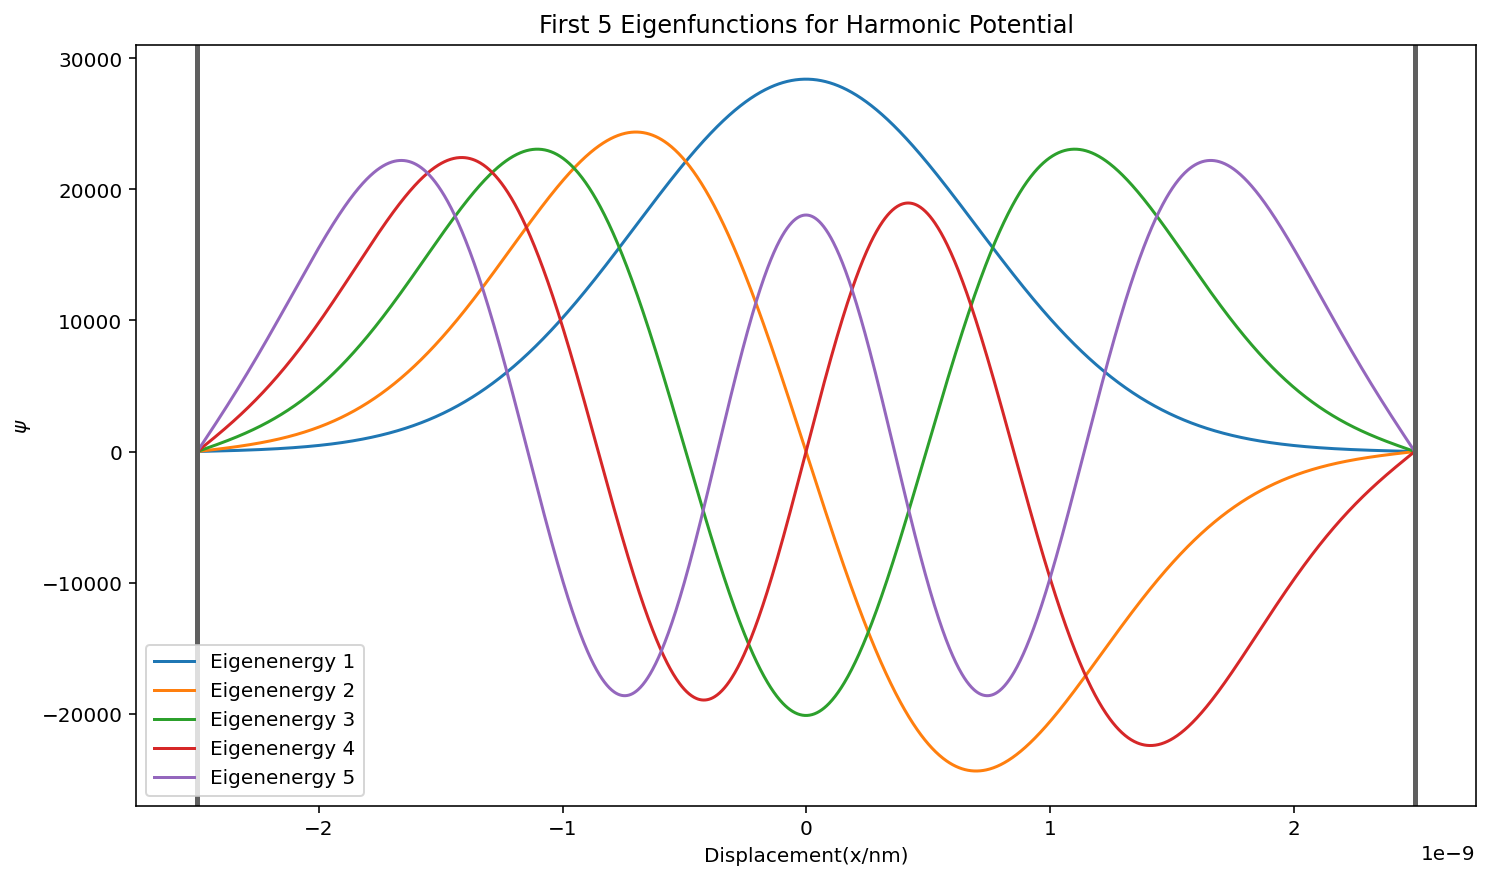

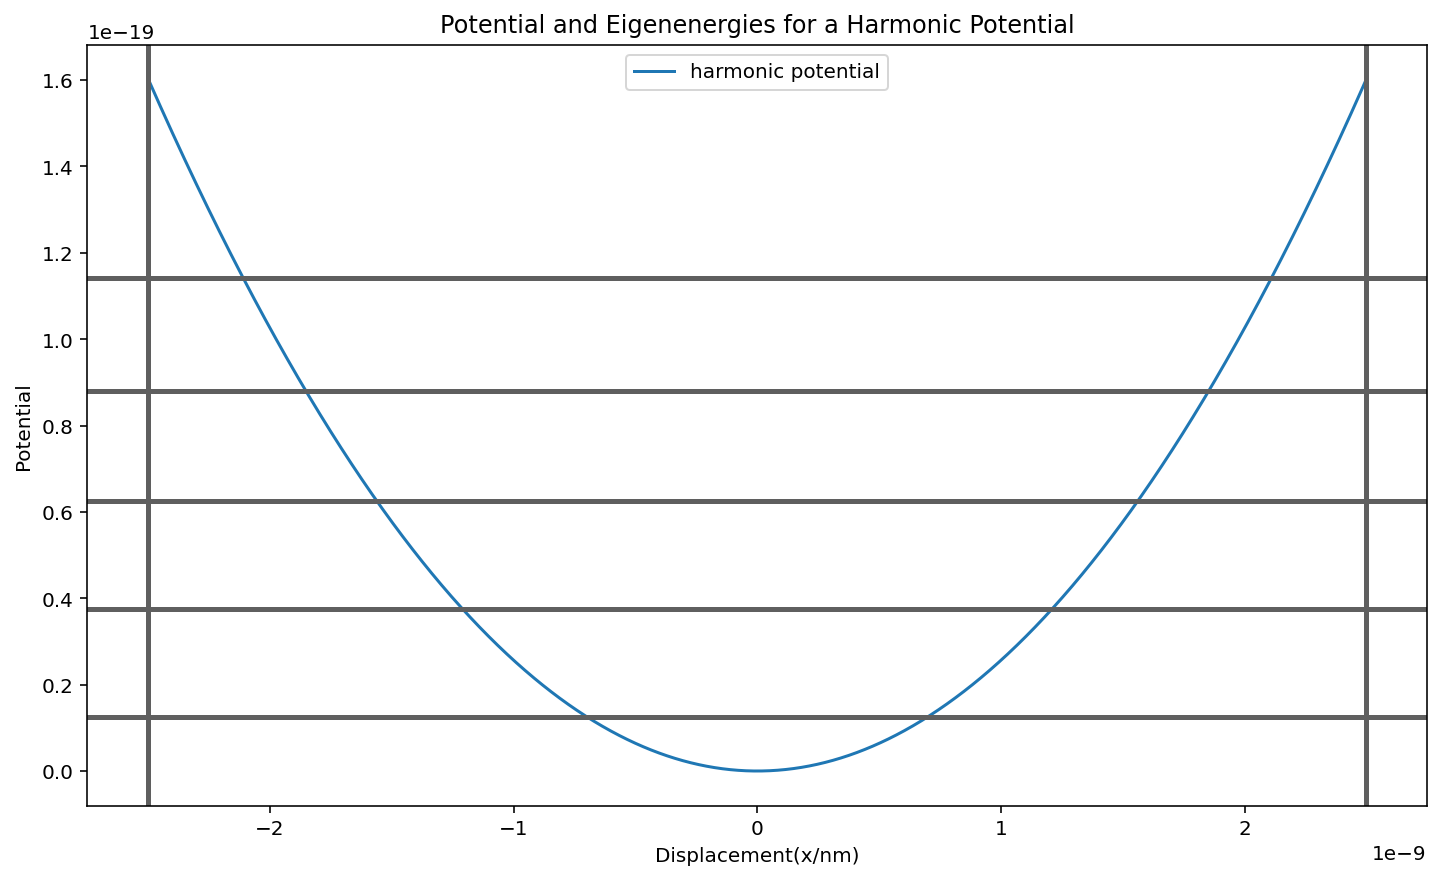

In [22]:
for i in eigenstates:
    psisquared = (RungeKutta2d_1(np.array([0]),pospoints,i))**2 #squaring the array
    psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2])) #integrating using the trapezoidal rule
    normpsi = (RungeKutta2d_1(np.array([0]),pospoints,i))/(np.sqrt(psiinteg)) #the normalised wavefunction
    N_1 = 2001 #since the normalised wavefunction has size 2001
    h_1 = (posend - posstart)/N_1 #step
    pospoints_1 = np.arange(posstart, posend, h_1) 
    plt.plot(pospoints_1, normpsi, '-', label = f"Eigenenergy {eigenstates.index(i)+1}")
plt.axvline(x=-a, c = '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a, c = '#5f5f5f',ls='-',lw=2.5)
plt.xlabel("Displacement(x/nm)")
plt.ylabel("$\psi$")
plt.title(f"First {len(eigenstates)} Eigenfunctions for Harmonic Potential")
plt.legend()
plt.figure()
plt.plot(pospoints_1, V_1(pospoints_1), '-', label = "harmonic potential") #plotting the potential
#plotting the walls
plt.axvline(x=-a, c = '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a, c = '#5f5f5f',ls='-',lw=2.5)
plt.xlabel("Displacement(x/nm)")
plt.ylabel("Potential")
plt.legend()
plt.title("Potential and Eigenenergies for a Harmonic Potential")
for i in eigenstates: #plot a horizontal line at every energy
    plt.axhline(y = i, c = '#5f5f5f',ls='-',lw=2.5)

For a harmonic potential:
$$V(x) = \frac{\omega_0^2m}{2}x^2$$
When the eigenfunctions are solved for analytically, the solutions are written as:
$$\phi_n(x) = A_nH_n\left(\sqrt{\frac{m\omega_0}{\hbar}x}\right)e^{-m\omega_0x^2/2\hbar}$$
Where, $H_n$ are the Hermite Polynomials and $A_n$ the normalisation constants. 
For the case above, the $\omega_0$ value can be written as:
$$\omega_0 = \sqrt{\frac{2V_0}{m_ea^2}}$$
The solutions for the corresponding eigenenergies are given by:
$$E = \hbar\omega_0\left(n+\frac{1}{2}\right), \ n = 0,1,2,3,...$$When the different eigensfunctions are plotted, they give the following graphs:

<center>
<img src="https://www.researchgate.net/publication/304085071/figure/fig2/AS:374480523284480@1466294522012/Eigenfunctions-for-the-Harmonic-oscillator-potential-The-confinement-potential-is-shown.png"   width="312px"  height="312px"  title="Eigenfunctions" style="object-fit:cover"/>

 <center>
(Montegranario, H., Londoño, M., Gómez, G. and Arango, R. 2016).

\(If the above image does not load, please see: [https://www.researchgate.net/publication/304085071/figure/fig2/AS:374480523284480@1466294522012/Eigenfunctions\-for\-the\-Harmonic\-oscillator\-potential\-The\-confinement\-potential\-is\-shown.png](https://www.researchgate.net/publication/304085071/figure/fig2/AS:374480523284480@1466294522012/Eigenfunctions-for-the-Harmonic-oscillator-potential-The-confinement-potential-is-shown.png) \)

Thankfully, these eigenfunctions seem to look mostly the same to those found using the Runge\-Kutta Method. The most obvious difference is the reflection on the x\-axis for all even number of eigenfunctions. This is not very worrying, however, as both solutions imply the same thing about the oscillation of the particle. It can be seem from the plot of the potential that all energies are evenly spaced from each other, as predicted by the analytic solution of the energies. Interestingly, this breaks down for any energy past the point where the potential reaches the infinite square well. While this could be due to an error in the solution of the energy itself, energies where this behaviour is noticed seem to initially agree the analytic value. Furthermore, it is even noticed that once this even spacing of energy stops, while, the solutions still maintain a waveform, they do not obey the boundary condition imposed, i.e, they do not reach 0 at the further end on the infinite square well.  



#### _II. Finite Square Well_



In the following section, the eigenvalues for the energies of a potential that describes a finite square well will be found and compared using the same method as above. For further analysis, eigenfunctions of this potential will be plotted as well. The finite square potential being used in this sections can be written as:
\begin{gather*}
  V_x=\left\{
    \begin{array}{ll}
      0, & \mbox{if $-a/2 \le x \le +a/2$}.\\
      V_0, & \mbox{if $\lvert x \rvert > a/2$}.
    \end{array}
  \right.
  \end{gather*}  



In [23]:
p_s = 1
def V_2(x):
    '''
    potential function for finite square well
    Input: 
        x: position array
    Output:
        v_2: potential
    '''
    v_2 = 0
    if abs(x) <= a/2:
        v_2 = 0
    elif abs(x) > a/2:
        v_2 = p_s*e
    return v_2

In [24]:
#Repurposed from PHAS0029-C7-instructions.ipnyb
def f_2(r,x,E):
    '''
    Function that calculates the RHS of 
    split first order schrödinger equation:
    Input: 
    r: array with values of wavefunction and differentiated wavefunction
    x: array with position points
    E: Energy of the wavefunction
    Output:
    array of values for RHS of split first order schrödinger equation
    '''
    psi = r[0]
    phi = r[1]
    fpsi = phi # rhs for dpsi/dx
    fphi = (2*m_e/(h_bar**2))*(V_2(x) - E)*psi #rhs for dphi/dx
    return np.array([fpsi,fphi])

In [25]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
def RungeKutta2d_2(r,pospoints, E):
    '''
    Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is psi, second phi
            pospoints: array of position values.
    Outputs:[psipoints]: solutions for psi(x), array of one value '''
    initialphi = 1 #guess for initial phi value
    r = np.array([0, initialphi],float) #initial r-value array
    psipoints = [] # initialise empty arrays
    for x in pospoints: # loops over all pospoints till a step before final value
        psipoints.append(r[0]) # append initial psi value into array

        #Apply Runge-Kutta

        k1 = h*f_2(r,x, E) 
        k2 = h*f_2(r+0.5*k1, x+0.5*h, E)
        k3 = h*f_2(r+0.5*k2, x+0.5*h, E)
        k4 = h*f_2(r+k3, x+h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    psipoints.append(r[0])
    #This value appended to the end to take care of the boundary condition, psi = 0 at ends.
    return np.array(psipoints)

In [26]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
d = 5e-9 #box length
a = d/2
posstart = -a #start x-position
posend = a #end x-position
N = 2000 
h = (posend - posstart)/N #step
pospoints = np.arange(posstart, posend, h)

#Energy guesses
E1 =0
E2 =1e-21

#finding psi value for both guesses
psi1_2 = RungeKutta2d_2(np.array([0]),pospoints,E1)[-1]
psi2_2 = RungeKutta2d_2(np.array([0]),pospoints,E2)[-1]
print (psi1_2,psi2_2)

0.000263817658156486 0.00020074616202994658


In [27]:
#Repurposed from PHAS0029-C8-SecantMethod.ipnyb
tolerance = e/100000
while abs(E1-E2) > tolerance: #while loop till tolerance is reached

    psi1_2 = RungeKutta2d_2(np.array([0]),pospoints, E1)[-1]
    psi2_2 = RungeKutta2d_2(np.array([0]),pospoints, E2)[-1]
    E3 = E2 - psi2_2*(E2-E1)/(psi2_2-psi1_2)
    E1 = E2
    E2 = E3 #copying to a new variable
    print(E2) #print after every iteration

print(f"Ground State energy is {E2/e} eV")

4.18283494698132e-21
5.708571923246123e-21


6.739705597860111e-21
7.115164422405154e-21


7.191649287293011e-21
7.196529497795208e-21


7.196584679339076e-21
Ground State energy is 0.044917548581220136 eV


In [28]:
#Energy guesses
E1 =0
E2 =1e-21

#finding psi value for both guesses
psi1_2 = RungeKutta2d_2(np.array([0]),pospoints,E1)[-1]
psi2_2 = RungeKutta2d_2(np.array([0]),pospoints,E2)[-1]

n = 0
z = 5 #Number of solutions required
E4 =2e-21 #smallest increment by which energy is increased to search for solution
E5 = 0 #holder for energy value
eigenstates = [] #holder of eigenenergies
c = 1 #factor
tolerance = e/100000
while n != z: #iteratie till z eigenvalues have been found
    while abs(E1-E2) > tolerance: #while loop till tolerance is reached
        psi1_2 = RungeKutta2d_2(np.array([0]),pospoints, E1)[-1]
        psi2_2 = RungeKutta2d_2(np.array([0]),pospoints, E2)[-1]
        E3 = E2 - psi2_2*(E2-E1)/(psi2_2-psi1_2)
        E1 = E2
        E2 = E3 #copying to a new variable

    if n != 0:
        if abs(E2 - E5) < (E4/2)*c: #check if new energy is the same as previous, *c to account for increasing value of eigenenergy
            n = n + 0
            c = c + 2 #increase factor
            E1 = 0
            E2 = E2 + c*E4 #add a greater value to E2, so it's closer to next eigenenergy
        else: #if new eigenenrgy has been reached
            n = n + 1 #increase n so that loop can move forward
            E1 = 0
            eigenstates.append(E2) #appened energy to array
            print(f"eigenenergy {n} is {E2/e} eV")
            E2 = E2 + E4 #start the process again for the next eigenenergy
            E5 = E3
            
    elif n == 0: #seperately written so that ground state energy can be initialised
        n = n + 1
        print(f"eigenenergy {n} is {E2/e} eV")
        eigenstates.append(E2) #append energy to array
        E4 = 2*10**OrderOfMagnitude(E2) #set new energy increase increment to the same order of magnitude as the first solution
        E1 = 0 #Set E1 to 0 again
        E2 = E2 + E4 #set new E2 value, to search for next eigenenergy
        E5 = E3 #store current E2 value in a new variable



eigenenergy 1 is 0.044917548581220136 eV


eigenenergy 2 is 0.17847511736282648 eV


eigenenergy 3 is 0.39630817915179767 eV


eigenenergy 4 is 0.6867753864371215 eV


eigenenergy 5 is 1.0063299639531118 eV


Text(0.5, 1.0, 'Potential and Eigenenergies for a Finite Square Well')

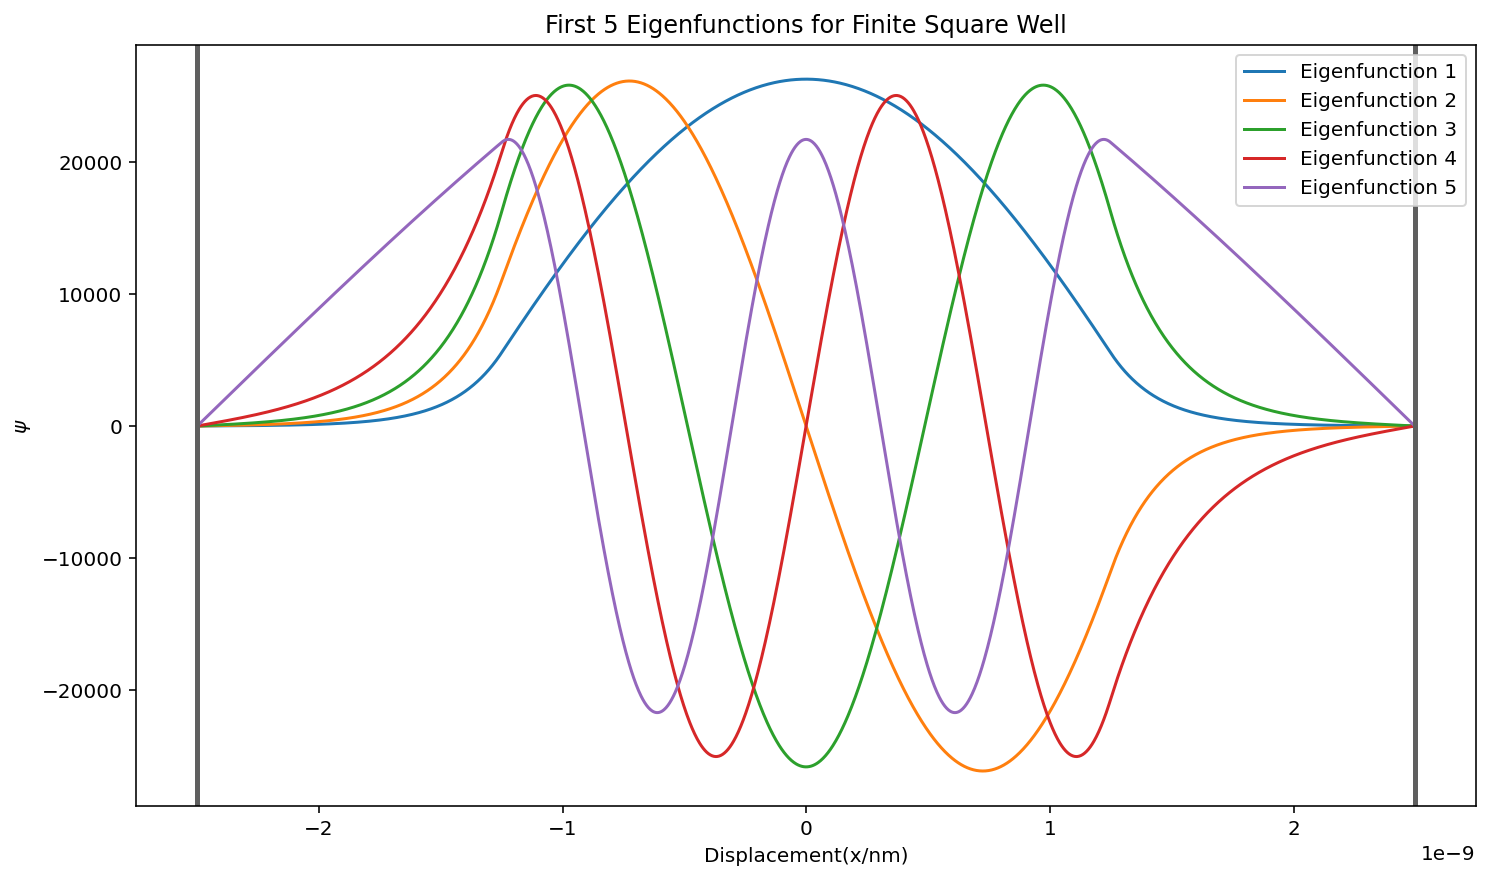

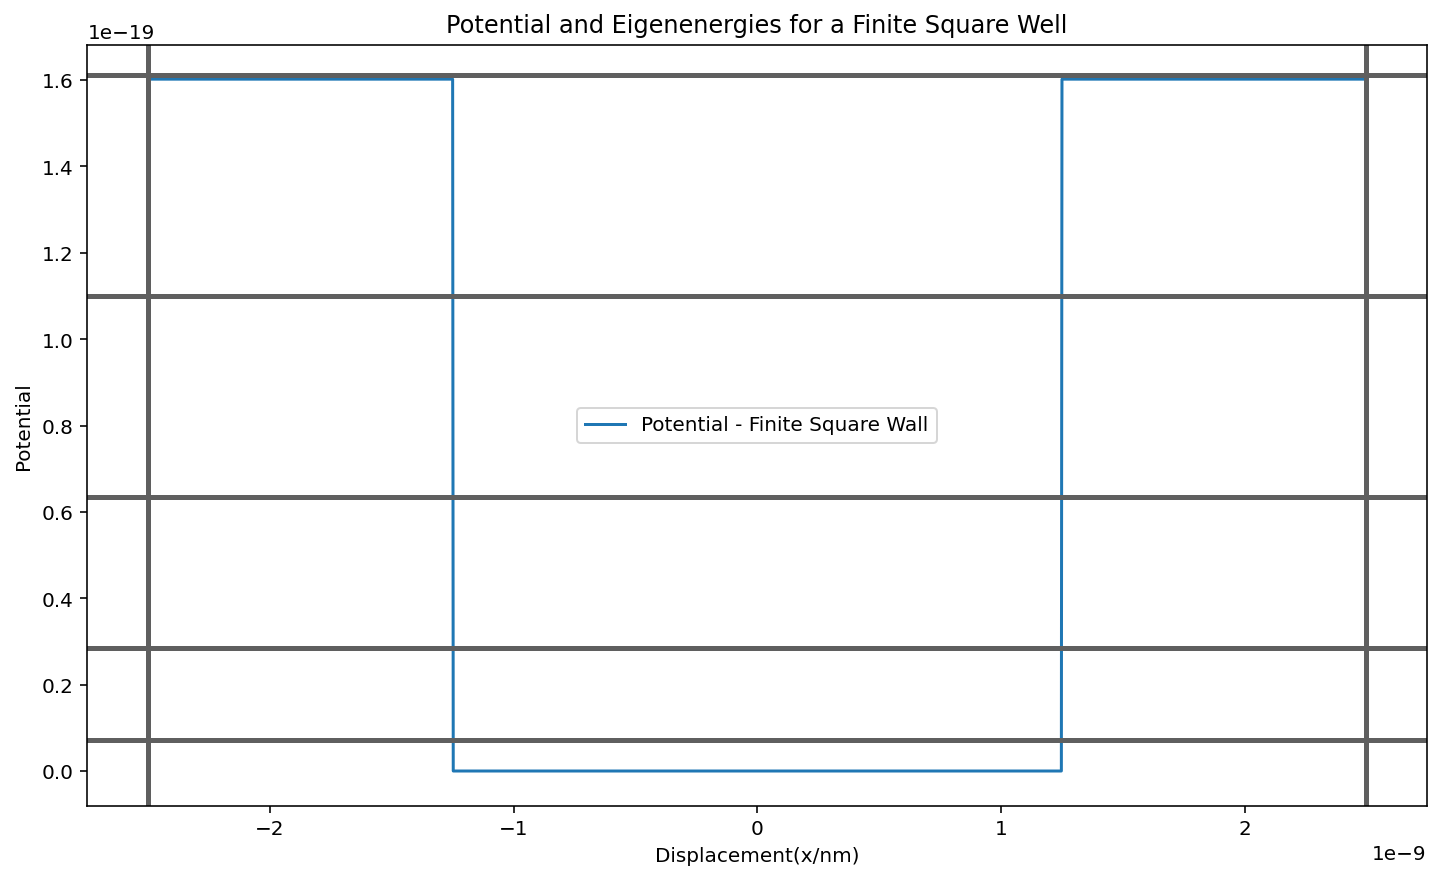

In [29]:
for i in eigenstates:
    psisquared = (RungeKutta2d_2(np.array([0]),pospoints,i))**2 #squaring the array
    psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2])) #integrating using the trapezoidal rule
    normpsi = (RungeKutta2d_2(np.array([0]),pospoints,i))/(np.sqrt(psiinteg)) #the normalised wavefunction
    N_1 = 2001 #since the normalised wavefunction has size 2001
    h_1 = (posend - posstart)/N_1 #step
    pospoints_1 = np.arange(posstart, posend, h_1) 
    plt.plot(pospoints_1, normpsi, '-', label = f"Eigenfunction {eigenstates.index(i)+1}")
#plot the walls
plt.title(f"First {len(eigenstates)} Eigenfunctions for Finite Square Well")
plt.xlabel("Displacement(x/nm)")
plt.ylabel("$\psi$")
plt.axvline(x=-a, c = '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a, c = '#5f5f5f',ls='-',lw=2.5)
plt.legend()
poten = [] #create an array to hold the diffferent values of potential
for i in pospoints_1: #iterate to find potential at every point
    poten.append(V_2(i))
plt.figure()
plt.plot(pospoints_1, poten, '-',label = "Potential - Finite Square Wall") #plotting the potential
plt.legend()
#plot the walls
plt.axvline(x=-a, c = '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a, c = '#5f5f5f',ls='-',lw=2.5)
for i in eigenstates:
    plt.axhline(y = i, c = '#5f5f5f',ls='-',lw=2.5) #plot a horizontal line at every energy
    
plt.xlabel("Displacement(x/nm)")
plt.ylabel("Potential")
plt.title(f"Potential and Eigenenergies for a Finite Square Well")

As stated before, this potential describes a finite square well. While an exact solution to this potential is difficult to find, general solutions that show the form of the eigenfunctions are relatively easier to show. For the part of the potential where $V = 0$, the solution is simply going to be the free particle solution, which is written as:
$$\psi = Acos(kx)+Bsin(kx)$$ where, $$k = \sqrt{\frac{2m_eE}{\hbar^2}}$$
When $V = V_0$, and the energy is lesser than that of the potential, the eigenfunctions on either side take the form of exponential decay, i.e,
$$Ce^{\kappa x}, Ce^{-\kappa x}$$To help provide a visual aid, a picture of the eigenfunctions is given below:

<center>
<img src="https://i.imgur.com/ejuNA0n.png"   width="454px"  height="257px"  title="FiniteSquareWall" style="object-fit:cover"/>

<center>    
(Thorne, R. Green, A. 2022)

(If the above image is not visible, please see, https://i.imgur.com/ejuNA0n.png)

As was the case before, these solutions are the same as the ones found through the Runge\-Kutta method. Compared to the harmonic potential, the energies in this case are not evenly spaced. Rather they seem to grow further apart the higher the energy found is. One of the more interesting cases in the solutions found was the fifth eigenenergy, that seems to linearly decay once it hits that potential wall. If looked at on the potential plot, it can be seen that it lies almost exactly on the upper bound of the potential. It is unclear whether this is a wrong solution, as one would theoretically expect a very sharp exponential decay instead of the linear decay that is seen. 

Another notable observation is that just as in the case of the harmonic potential, the orderly pattern the difference in energy levels seems to fall apart when the energy grows larger than the potential. Furthermore, once again, just as in the case of the harmonic potential, it is at this point that the eigenfunctions start disoberying the boundary conditions and do not reach zero at the further end of the infinite wall. While both of these could be reasoned to be due to a mistake in the method used to find these energies, it is unlikely that mistakes would occur precisely when the energy goes above the potential for both cases considered.  



## Conclusion

In the above notebook, ground state and excited energies and eigenfunctions were found for three different potentials. Namely, the infinite square well, a harmonic potential, and a finite square well. These were compared to their analytical solution, even quantitatively where possible. These solutions seemed to match for the first few eigenstates, with a few discrepancies in some of the solutions. While solutions were very accurate for the infinite square well, they seemed to be slightly less accurate for the other potentials, for which multiple reasons could be cause. Finally, the eigenenergies were plotted with the potential for the harmonic potential and finite square well. The solutions seemed to break down exactly once the energy of the solution was greater than that of the potential. The reason for this was not entirely clear, and it could have been due to the method used to finding the roots.  



### Bibliography

- Dash, L. 2020. " PHAS0029FinalAssignmentSupplementaryNotebook". \[Online\] UCL Moodle resource. Available from [https://moodle.ucl.ac.uk/mod/resource/view.php?id=4766052 ](https://moodle.ucl.ac.uk/course/view.php?id=6766&section=14)  \[accessed 27th March 2023\]
- Thorne, R. Green, A. "Section 4 Notes Parts 1 and 2" \[online\] Available at: https://moodle.ucl.ac.uk/mod/resource/view.php?id=4549212. \[accessed 27th March 2023\]
- Montegranario, H., Londoño, M., Gómez, G. and Arango, R. \(2016\). Solving Schrödinger equation by meshless methods. \[online\] ResearchGate. Available at: [https://www.researchgate.net/publication/304085071\\\_Solving\\\_Schrodinger\\\_equation\\\_by\\\_meshless\\\_methods](https://www.researchgate.net/publication/304085071%5C_Solving%5C_Schrodinger%5C_equation%5C_by%5C_meshless%5C_methods) \[Accessed 27 Mar. 2023\].  
  ‌

